In [1]:
import os
import warnings
from pathlib import Path
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii, fits
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

import evaluation_utils
import importlib
importlib.reload(evaluation_utils)

from calculate_completeness_fraction import validation_hist
from cross_match_catalogs import read_catalog, match_catalogs_img


%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

In [2]:
chip_label = "07"
pointing_label = "MSC_0000000"
fig_root_dir = "./fig_for_demonstration"
if not os.path.exists(fig_root_dir):
    os.makedirs(fig_root_dir)

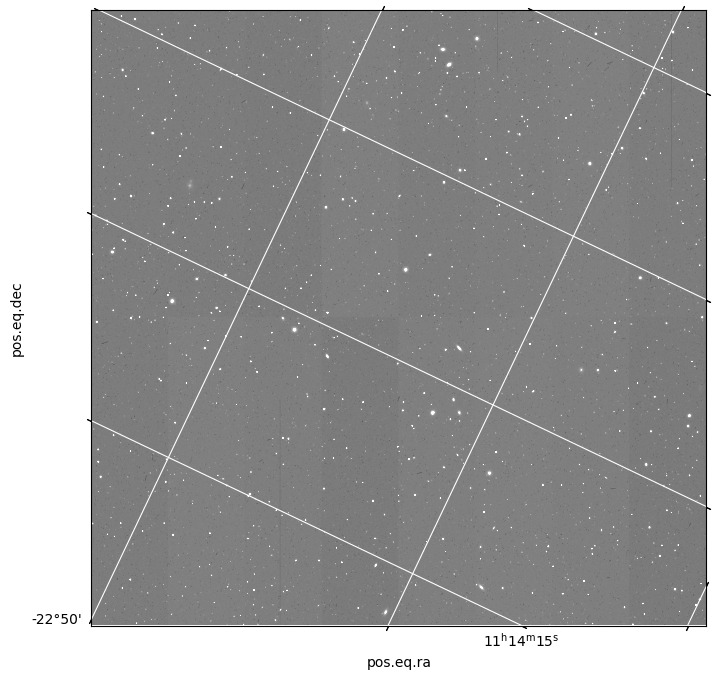

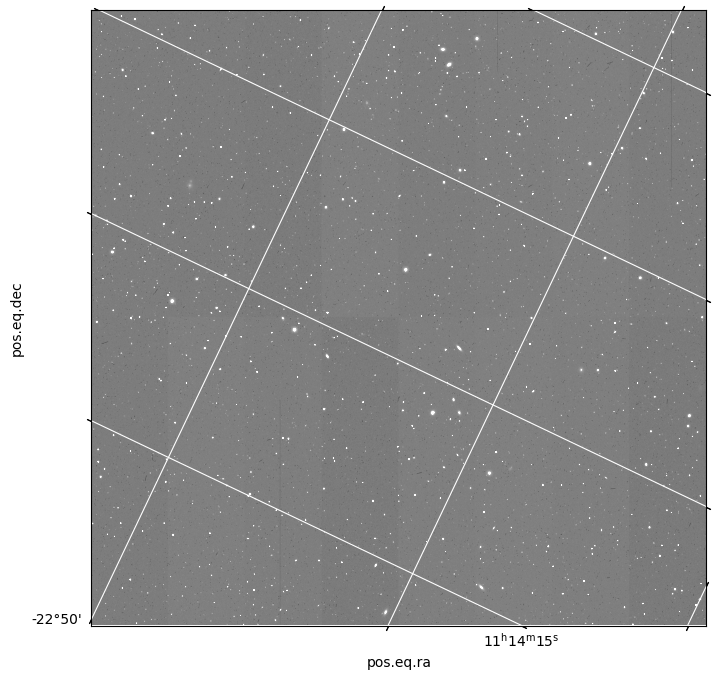

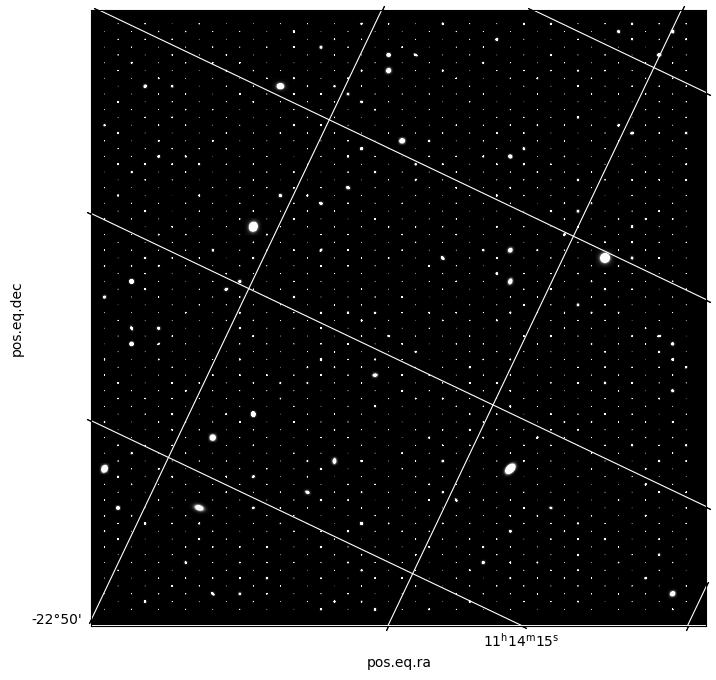

In [3]:
sky_area_label="W2"

l1_img_dir = "/public/home/fangyuedong/project/50sqDeg_L1_outputs/50sqDeg_Photo_%s/%s/"%(sky_area_label, pointing_label)
l1_img = glob(l1_img_dir + "/*_%s_img*.fits"%(chip_label))[0]
l1_flg = glob(l1_img_dir + "/*_%s_flg*.fits"%(chip_label))[0]

l1_injected_dir = "/public/home/fangyuedong/project/injected_50sqDeg_L1_outputs/50sqDeg_Photo_%s/%s/"%(sky_area_label, pointing_label)
injected_img = glob(l1_injected_dir + "/*_%s*.fits"%(chip_label))[0]

evaluation_utils.plot_injection_comparison(orig_img=l1_img,
                         injected_img=injected_img,
                         flg_img=l1_flg,
                         save_fig_dir=fig_root_dir,
                         fig_prefix="%s_%s_%s_"%(sky_area_label, pointing_label, chip_label),
                         figsize=(8, 8))

# 1. L1 photometry results: (chip_id: 07, i band)

## 1.1 patch: W2

number of objects in CSST_MSC_MS_SCIE_20220708044845_20220708045115_10160000000_07_cat_L1.fits: 7690
number of objects in CSST_MSC_MS_SCIE_20220708045840_20220708050110_10160000003_07_cat_L1.fits: 8607
number of objects in CSST_MSC_MS_SCIE_20220708062444_20220708062714_10160000005_07_cat_L1.fits: 8101
number of objects in CSST_MSC_MS_SCIE_20220708063120_20220708063350_10160000007_07_cat_L1.fits: 7253
number of objects in CSST_MSC_MS_SCIE_20220708105810_20220708110040_10160000009_07_cat_L1.fits: 8049
number of objects in CSST_MSC_MS_SCIE_20220708045204_20220708045434_10160000001_07_cat_L1.fits: 7932
number of objects in CSST_MSC_MS_SCIE_20220708045522_20220708045752_10160000002_07_cat_L1.fits: 8011
number of objects in CSST_MSC_MS_SCIE_20220708062126_20220708062356_10160000004_07_cat_L1.fits: 8010
number of objects in CSST_MSC_MS_SCIE_20220708062802_20220708063032_10160000006_07_cat_L1.fits: 7951
number of objects in CSST_MSC_MS_SCIE_20220708063438_20220708063708_10160000008_07_cat_L1.f

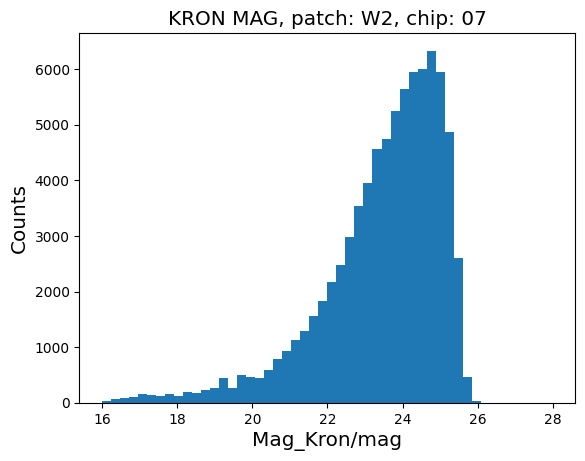

In [4]:
sky_area_label="W2"
# chip_label = "08"

l1_output_dir = "/public/home/fangyuedong/project/50sqDeg_L1_outputs/50sqDeg_Photo_%s/"%(sky_area_label)
cat_path_list_l1 = glob(l1_output_dir + "*/*%s_cat*"%(chip_label))

evaluation_utils.plot_ensemble_hist(cat_path_list=cat_path_list_l1,
                                   save_fig_dir=fig_root_dir,
                                   fig_prefix="%s_%s_%s_"%(sky_area_label, chip_label, "orig"),
                                   title="KRON MAG, patch: %s, chip: %s"%(sky_area_label, chip_label))

## 1.2 patch: W3

number of objects in CSST_MSC_MS_SCIE_20230413214557_20230413214827_10160000001_07_cat_L1.fits: 8292
number of objects in CSST_MSC_MS_SCIE_20230414052807_20230414053037_10160000002_07_cat_L1.fits: 7189
number of objects in CSST_MSC_MS_SCIE_20231014221159_20231014221429_10160000003_07_cat_L1.fits: 7590
number of objects in CSST_MSC_MS_SCIE_20231017131811_20231017132041_10160000004_07_cat_L1.fits: 7814
number of objects in CSST_MSC_MS_SCIE_20231206130710_20231206130940_10160000006_07_cat_L1.fits: 7764
number of objects in CSST_MSC_MS_SCIE_20240411065401_20240411065631_10160000008_07_cat_L1.fits: 6668
number of objects in CSST_MSC_MS_SCIE_20230413170825_20230413171055_10160000000_07_cat_L1.fits: 8301
number of objects in CSST_MSC_MS_SCIE_20231018000424_20231018000654_10160000005_07_cat_L1.fits: 7444
number of objects in CSST_MSC_MS_SCIE_20231206174315_20231206174545_10160000007_07_cat_L1.fits: 7268
number of objects in CSST_MSC_MS_SCIE_20240411130221_20240411130451_10160000009_07_cat_L1.f

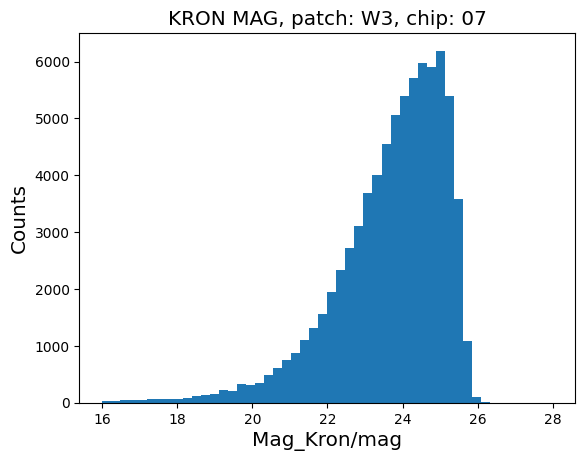

In [5]:
sky_area_label="W3"
# chip_label = "08"

l1_output_dir = "/public/home/fangyuedong/project/50sqDeg_L1_outputs/50sqDeg_Photo_%s/"%(sky_area_label)

cat_path_list_l1 = glob(l1_output_dir + "*/*%s_cat*"%(chip_label))

evaluation_utils.plot_ensemble_hist(cat_path_list=cat_path_list_l1,
                                   save_fig_dir=fig_root_dir,
                                   fig_prefix="%s_%s_%s_"%(sky_area_label, chip_label, "orig"),
                                   title="KRON MAG, patch: %s, chip: %s"%(sky_area_label, chip_label))

In [6]:
hdu = fits.open(cat_path_list_l1[0])
print("Column names of L1 processed photometry catalog", hdu[1].data.names)

Column names of L1 processed photometry catalog ['ID', 'ObsID', 'CCDNo', 'Filter', 'ObjID', 'X', 'XErr', 'Y', 'YErr', 'RA', 'RAErr', 'DEC', 'DECErr', 'A', 'AErr', 'B', 'BErr', 'PA', 'Flag', 'Flag_ISO', 'Flag_ISO_Num', 'FWHM', 'AB', 'E', 'Flux_Kron', 'FluxErr_Kron', 'Mag_Kron', 'MagErr_Kron', 'Radius_Kron', 'Sky', 'Flux_Aper1', 'FluxErr_Aper1', 'Mag_Aper1', 'MagErr_Aper1', 'Flux_Aper2', 'FluxErr_Aper2', 'Mag_Aper2', 'MagErr_Aper2', 'Flux_Aper3', 'FluxErr_Aper3', 'Mag_Aper3', 'MagErr_Aper3', 'Flux_Aper4', 'FluxErr_Aper4', 'Mag_Aper4', 'MagErr_Aper4', 'Flux_Aper5', 'FluxErr_Aper5', 'Mag_Aper5', 'MagErr_Aper5', 'Flux_Aper6', 'FluxErr_Aper6', 'Mag_Aper6', 'MagErr_Aper6', 'Flux_Aper7', 'FluxErr_Aper7', 'Mag_Aper7', 'MagErr_Aper7', 'Flux_Aper8', 'FluxErr_Aper8', 'Mag_Aper8', 'MagErr_Aper8', 'Flux_Aper9', 'FluxErr_Aper9', 'Mag_Aper9', 'MagErr_Aper9', 'Flux_Aper10', 'FluxErr_Aper10', 'Mag_Aper10', 'MagErr_Aper10', 'Flux_Aper11', 'FluxErr_Aper11', 'Mag_Aper11', 'MagErr_Aper11', 'Flux_Aper12', 'F

# 2. Properties of injected sources: (chip_id: 08, g band)

## 2.1 patch: W2

Colum names in injected truth catalog:  ['obj_ID', 'ID_chip', 'filter', 'xImage', 'yImage', 'ra', 'dec', 'ra_orig', 'dec_orig', 'z', 'mag', 'obj_type', 'pm_ra', 'pm_dec', 'RV', 'parallax']
number of objects in CSST_MSC_MS_SCIE_20220708045204_20220708045434_10160000001_07_img_L1_injected.cat: 1672
number of objects in CSST_MSC_MS_SCIE_20220708045840_20220708050110_10160000003_07_img_L1_injected.cat: 1672
number of objects in CSST_MSC_MS_SCIE_20220708062126_20220708062356_10160000004_07_img_L1_injected.cat: 1672
number of objects in CSST_MSC_MS_SCIE_20220708062444_20220708062714_10160000005_07_img_L1_injected.cat: 1672
number of objects in CSST_MSC_MS_SCIE_20220708062802_20220708063032_10160000006_07_img_L1_injected.cat: 1672
number of objects in CSST_MSC_MS_SCIE_20220708063438_20220708063708_10160000008_07_img_L1_injected.cat: 1672
number of objects in CSST_MSC_MS_SCIE_20220708044845_20220708045115_10160000000_07_img_L1_injected.cat: 1672
number of objects in CSST_MSC_MS_SCIE_2022070804

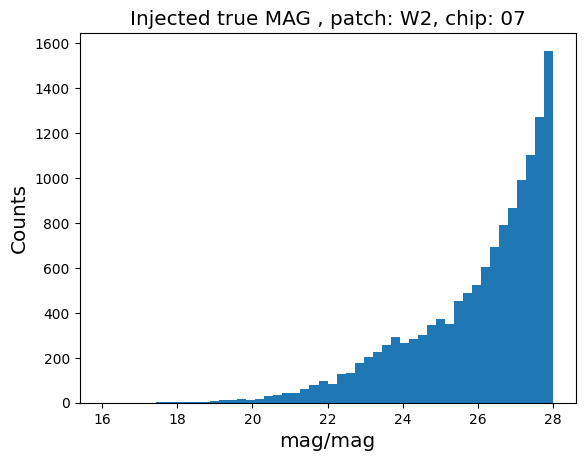

In [7]:
sky_area_label="W2"
# chip_label = "08"
injected_truth_dir = "/public/home/fangyuedong/project/injected_50sqDeg_L1_outputs/50sqDeg_Photo_%s/"%(sky_area_label)

cat_path_list_injected_truth = glob(injected_truth_dir + "*/*_%s_*.cat*"%(chip_label))

data = ascii.read(cat_path_list_injected_truth[0])
print("Colum names in injected truth catalog: ", data.colnames)

evaluation_utils.plot_ensemble_hist(cat_path_list=cat_path_list_injected_truth,
                                    column_name="mag",
                                    save_fig_dir=fig_root_dir,
                                    fig_prefix="%s_%s_%s_"%(sky_area_label, chip_label, "inj_truth"),
                                    title="Injected true MAG , patch: %s, chip: %s"%(sky_area_label, chip_label))

## 2.2 patch: W3

Colum names in injected truth catalog:  ['obj_ID', 'ID_chip', 'filter', 'xImage', 'yImage', 'ra', 'dec', 'ra_orig', 'dec_orig', 'z', 'mag', 'obj_type', 'pm_ra', 'pm_dec', 'RV', 'parallax']
number of objects in CSST_MSC_MS_SCIE_20230413170825_20230413171055_10160000000_07_img_L1_injected.cat: 1672
number of objects in CSST_MSC_MS_SCIE_20231014221159_20231014221429_10160000003_07_img_L1_injected.cat: 1672
number of objects in CSST_MSC_MS_SCIE_20231018000424_20231018000654_10160000005_07_img_L1_injected.cat: 1672
number of objects in CSST_MSC_MS_SCIE_20231206174315_20231206174545_10160000007_07_img_L1_injected.cat: 1672
number of objects in CSST_MSC_MS_SCIE_20240411130221_20240411130451_10160000009_07_img_L1_injected.cat: 1672
number of objects in CSST_MSC_MS_SCIE_20230413214557_20230413214827_10160000001_07_img_L1_injected.cat: 1671
number of objects in CSST_MSC_MS_SCIE_20230414052807_20230414053037_10160000002_07_img_L1_injected.cat: 1671
number of objects in CSST_MSC_MS_SCIE_2023101713

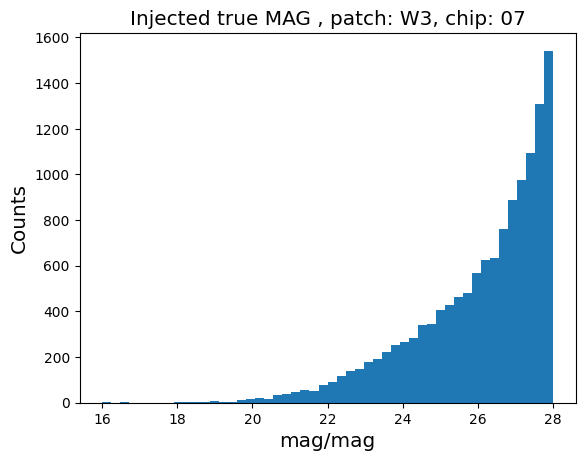

In [8]:
sky_area_label="W3"
# chip_label = "08"
injected_truth_dir = "/public/home/fangyuedong/project/injected_50sqDeg_L1_outputs/50sqDeg_Photo_%s/"%(sky_area_label)

cat_path_list_injected_truth = glob(injected_truth_dir + "*/*_%s_*.cat*"%(chip_label))

data = ascii.read(cat_path_list_injected_truth[0])
print("Colum names in injected truth catalog: ", data.colnames)

evaluation_utils.plot_ensemble_hist(cat_path_list=cat_path_list_injected_truth,
                                    column_name="mag",
                                    save_fig_dir=fig_root_dir,
                                    fig_prefix="%s_%s_%s_"%(sky_area_label, chip_label, "inj_truth"),
                                    title="Injected true MAG , patch: %s, chip: %s"%(sky_area_label, chip_label))

# 3. L1 photometry results on injected images: (chip_id: 08, g band)

## 3.1 patch: W2

number of objects in CSST_MSC_MS_SCIE_20220708044845_20220708045115_10160000000_07_cat_L1_injected.fits: 8024
number of objects in CSST_MSC_MS_SCIE_20220708045522_20220708045752_10160000002_07_cat_L1_injected.fits: 8408
number of objects in CSST_MSC_MS_SCIE_20220708062444_20220708062714_10160000005_07_cat_L1_injected.fits: 8474
number of objects in CSST_MSC_MS_SCIE_20220708063120_20220708063350_10160000007_07_cat_L1_injected.fits: 7644
number of objects in CSST_MSC_MS_SCIE_20220708105810_20220708110040_10160000009_07_cat_L1_injected.fits: 8431
number of objects in CSST_MSC_MS_SCIE_20220708045204_20220708045434_10160000001_07_cat_L1_injected.fits: 8339
number of objects in CSST_MSC_MS_SCIE_20220708045840_20220708050110_10160000003_07_cat_L1_injected.fits: 9019
number of objects in CSST_MSC_MS_SCIE_20220708062126_20220708062356_10160000004_07_cat_L1_injected.fits: 8375
number of objects in CSST_MSC_MS_SCIE_20220708062802_20220708063032_10160000006_07_cat_L1_injected.fits: 8365
number of 

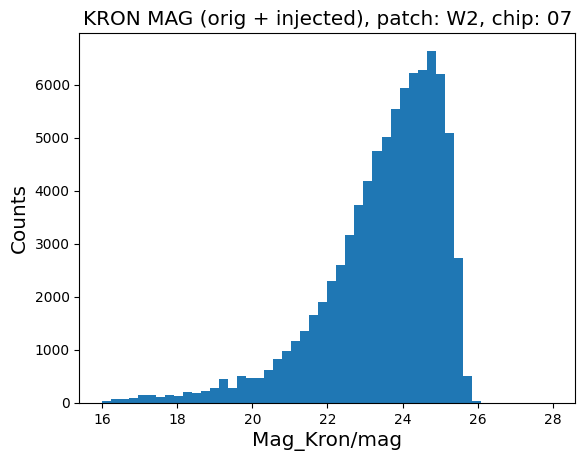

In [9]:
sky_area_label="W2"
# chip_label = "08"
injected_l1_output_dir = "/public/home/fangyuedong/project/processed_injected_50sqDeg_L1_outputs/50sqDeg_Photo_%s/"%(sky_area_label)

cat_path_list_injected_l1 = glob(injected_l1_output_dir + "*/*%s_cat*"%(chip_label))

evaluation_utils.plot_ensemble_hist(cat_path_list=cat_path_list_injected_l1,
                                   save_fig_dir=fig_root_dir,
                                   fig_prefix="%s_%s_%s_"%(sky_area_label, chip_label, "measured"),
                                   title="KRON MAG (orig + injected), patch: %s, chip: %s"%(sky_area_label, chip_label))

## 3.2 patch: W3

number of objects in CSST_MSC_MS_SCIE_20230413170825_20230413171055_10160000000_07_cat_L1_injected.fits: 8711
number of objects in CSST_MSC_MS_SCIE_20230414052807_20230414053037_10160000002_07_cat_L1_injected.fits: 7633
number of objects in CSST_MSC_MS_SCIE_20231017131811_20231017132041_10160000004_07_cat_L1_injected.fits: 8190
number of objects in CSST_MSC_MS_SCIE_20231206130710_20231206130940_10160000006_07_cat_L1_injected.fits: 8169
number of objects in CSST_MSC_MS_SCIE_20240411130221_20240411130451_10160000009_07_cat_L1_injected.fits: 7947
number of objects in CSST_MSC_MS_SCIE_20230413214557_20230413214827_10160000001_07_cat_L1_injected.fits: 8713
number of objects in CSST_MSC_MS_SCIE_20231014221159_20231014221429_10160000003_07_cat_L1_injected.fits: 7978
number of objects in CSST_MSC_MS_SCIE_20231018000424_20231018000654_10160000005_07_cat_L1_injected.fits: 7829
number of objects in CSST_MSC_MS_SCIE_20231206174315_20231206174545_10160000007_07_cat_L1_injected.fits: 7689
number of 

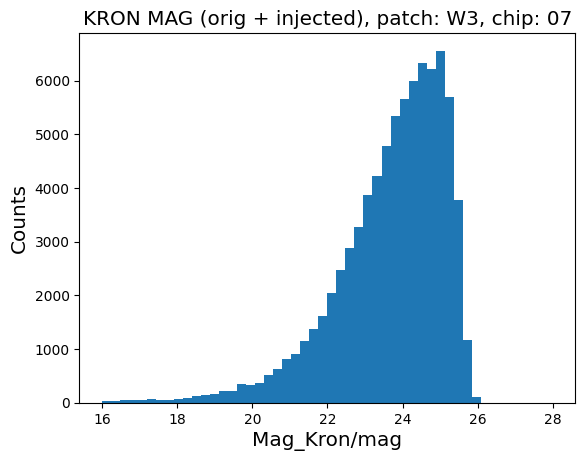

In [10]:
sky_area_label="W3"
# chip_label = "08"
injected_l1_output_dir = "/public/home/fangyuedong/project/processed_injected_50sqDeg_L1_outputs/50sqDeg_Photo_%s/"%(sky_area_label)

cat_path_list_injected_l1 = glob(injected_l1_output_dir + "*/*%s_cat*"%(chip_label))

evaluation_utils.plot_ensemble_hist(cat_path_list=cat_path_list_injected_l1,
                                   save_fig_dir=fig_root_dir,
                                   fig_prefix="%s_%s_%s_"%(sky_area_label, chip_label, "measured"),
                                   title="KRON MAG (orig + injected), patch: %s, chip: %s"%(sky_area_label, chip_label))

# 4. Matching and complteness checking

## 4.1 patch: W2

Injected truth catalog:  CSST_MSC_MS_SCIE_20220708045204_20220708045434_10160000001_07_img_L1_injected.cat
L1 processed photometry catalog:  CSST_MSC_MS_SCIE_20220708045204_20220708045434_10160000001_07_cat_L1_injected.fits
number of matched sources =  437
Injected truth catalog:  CSST_MSC_MS_SCIE_20220708045840_20220708050110_10160000003_07_img_L1_injected.cat
L1 processed photometry catalog:  CSST_MSC_MS_SCIE_20220708045840_20220708050110_10160000003_07_cat_L1_injected.fits
number of matched sources =  439
Injected truth catalog:  CSST_MSC_MS_SCIE_20220708062126_20220708062356_10160000004_07_img_L1_injected.cat
L1 processed photometry catalog:  CSST_MSC_MS_SCIE_20220708062126_20220708062356_10160000004_07_cat_L1_injected.fits
number of matched sources =  378
Injected truth catalog:  CSST_MSC_MS_SCIE_20220708062444_20220708062714_10160000005_07_img_L1_injected.cat
L1 processed photometry catalog:  CSST_MSC_MS_SCIE_20220708062444_20220708062714_10160000005_07_cat_L1_injected.fits
numbe

/public/home/fangyuedong/project/injection_pipeline/evaluation/evaluation_utils.py:107: RuntimeWarning: invalid value encountered in divide
  fraction = counts_detected / counts


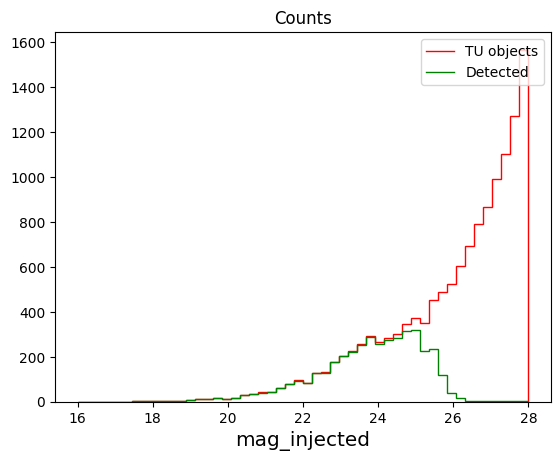

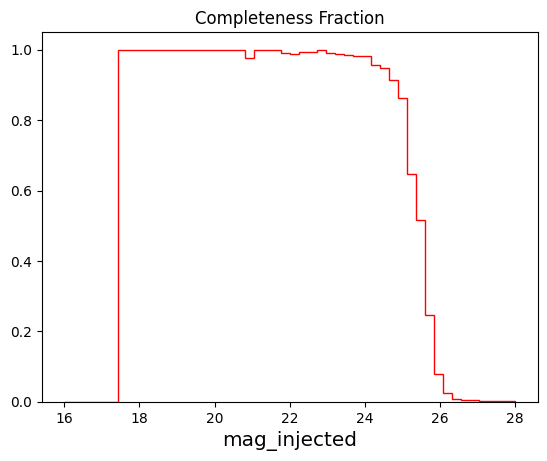

In [14]:
injected_truth_dir = "/public/home/fangyuedong/project/injected_50sqDeg_L1_outputs/50sqDeg_Photo_W2/"
injected_l1_output_dir = "/public/home/fangyuedong/project/processed_injected_50sqDeg_L1_outputs/50sqDeg_Photo_W2/"

# chip_label = "08"
nbins = 50
bins = np.linspace(16., 28., nbins+1)

counts = np.zeros(nbins)
counts_detected = np.zeros(nbins)

cat_path_list_injected_truth = glob(injected_truth_dir + "*/*_%s_*.cat*"%(chip_label))
cat_path_list_injected_l1 = glob(injected_l1_output_dir + "*/*%s_cat*"%(chip_label))

for cat_path_injected_truth in cat_path_list_injected_truth:
    print("Injected truth catalog: ", os.path.basename(cat_path_injected_truth))
    obs_id = cat_path_injected_truth.split('/')[-2]
    data = ascii.read(cat_path_injected_truth)
    x_truth = data["xImage"]
    y_truth = data["yImage"]
    mag_truth = data["mag"]
    
    cat_path_injected_l1 = os.path.join(injected_l1_output_dir,
                                        obs_id,
                                        os.path.basename(cat_path_injected_truth).replace("img", "cat").replace(".cat", ".fits"))
    print("L1 processed photometry catalog: ", os.path.basename(cat_path_injected_l1))
    hdu = fits.open(cat_path_injected_l1)
    x_measure = hdu[1].data["X"]
    y_measure = hdu[1].data["Y"]
    mag_measure = hdu[1].data["Mag_Kron"]
    
    idx1, _, = match_catalogs_img(x1=x_truth, y1=y_truth, x2=x_measure, y2=y_measure)
    
    counts_temp, counts_detected_temp, _ = evaluation_utils.validation_hist(val=mag_truth, 
                                                           idx=idx1, 
                                                           name="mag_injected", 
                                                           bins=bins, 
                                                           output_dir='./', 
                                                           create_figure=False)
    counts += counts_temp
    counts_detected += counts_detected_temp

fig1, ax1 = evaluation_utils.create_hist_figure(counts, counts_detected, bins, "mag_injected", './')
fig1.savefig(os.path.join(fig_root_dir, "detection_recovered_W2.png"))
fig1
fig2, ax2, fraction = evaluation_utils.create_fraction_figure(counts, counts_detected, bins, 'mag_injected', './', label="W2")

## 4.2 patch: W3

Injected truth catalog:  CSST_MSC_MS_SCIE_20230413170825_20230413171055_10160000000_07_img_L1_injected.cat
L1 processed photometry catalog:  CSST_MSC_MS_SCIE_20230413170825_20230413171055_10160000000_07_cat_L1_injected.fits
number of matched sources =  421
Injected truth catalog:  CSST_MSC_MS_SCIE_20231014221159_20231014221429_10160000003_07_img_L1_injected.cat
L1 processed photometry catalog:  CSST_MSC_MS_SCIE_20231014221159_20231014221429_10160000003_07_cat_L1_injected.fits
number of matched sources =  407
Injected truth catalog:  CSST_MSC_MS_SCIE_20231018000424_20231018000654_10160000005_07_img_L1_injected.cat
L1 processed photometry catalog:  CSST_MSC_MS_SCIE_20231018000424_20231018000654_10160000005_07_cat_L1_injected.fits
number of matched sources =  398
Injected truth catalog:  CSST_MSC_MS_SCIE_20231206174315_20231206174545_10160000007_07_img_L1_injected.cat
L1 processed photometry catalog:  CSST_MSC_MS_SCIE_20231206174315_20231206174545_10160000007_07_cat_L1_injected.fits
numbe

/public/home/fangyuedong/project/injection_pipeline/evaluation/evaluation_utils.py:107: RuntimeWarning: invalid value encountered in divide
  fraction = counts_detected / counts


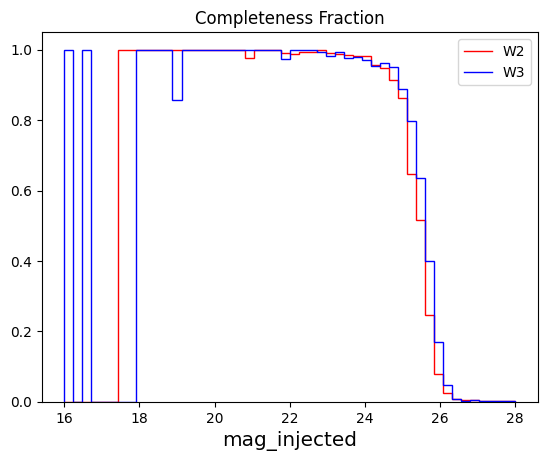

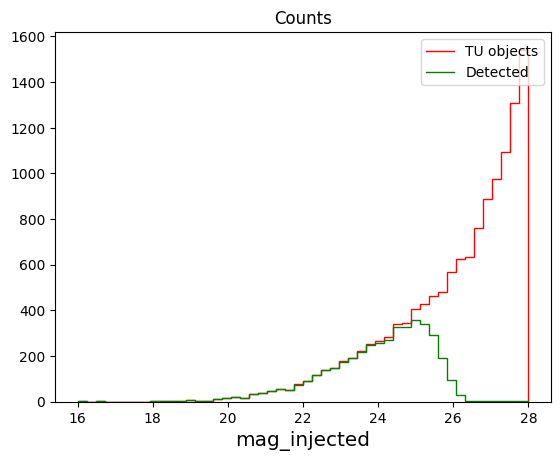

In [15]:
injected_truth_dir = "/public/home/fangyuedong/project/injected_50sqDeg_L1_outputs/50sqDeg_Photo_W3/"
injected_l1_output_dir = "/public/home/fangyuedong/project/processed_injected_50sqDeg_L1_outputs/50sqDeg_Photo_W3/"

# chip_label = "07"
nbins = 50
bins = np.linspace(16., 28., nbins+1)

counts = np.zeros(nbins)
counts_detected = np.zeros(nbins)

cat_path_list_injected_truth = glob(injected_truth_dir + "*/*_%s_*.cat*"%(chip_label))
cat_path_list_injected_l1 = glob(injected_l1_output_dir + "*/*%s_cat*"%(chip_label))

for cat_path_injected_truth in cat_path_list_injected_truth:
    print("Injected truth catalog: ", os.path.basename(cat_path_injected_truth))
    obs_id = cat_path_injected_truth.split('/')[-2]
    data = ascii.read(cat_path_injected_truth)
    x_truth = data["xImage"]
    y_truth = data["yImage"]
    mag_truth = data["mag"]
    
    cat_path_injected_l1 = os.path.join(injected_l1_output_dir,
                                        obs_id,
                                        os.path.basename(cat_path_injected_truth).replace("img", "cat").replace(".cat", ".fits"))
    print("L1 processed photometry catalog: ", os.path.basename(cat_path_injected_l1))
    hdu = fits.open(cat_path_injected_l1)
    x_measure = hdu[1].data["X"]
    y_measure = hdu[1].data["Y"]
    mag_measure = hdu[1].data["Mag_Kron"]
    
    idx1, _, = match_catalogs_img(x1=x_truth, y1=y_truth, x2=x_measure, y2=y_measure)
    
    counts_temp, counts_detected_temp, _ = evaluation_utils.validation_hist(val=mag_truth, 
                                                           idx=idx1, 
                                                           name="mag_injected", 
                                                           bins=bins, 
                                                           output_dir='./', 
                                                           create_figure=False)
    counts += counts_temp
    counts_detected += counts_detected_temp

fig1, ax1 = evaluation_utils.create_hist_figure(counts, counts_detected, bins, "mag_injected", './')
fig1.savefig(os.path.join(fig_root_dir, "detection_recovered_W3.png"))
fig2, ax2, fraction = evaluation_utils.create_fraction_figure(counts, counts_detected, bins, 'mag_injected', './', figure=fig2, label='W3', 
                                             color='blue', show_legend=True)
fig2.savefig(os.path.join(fig_root_dir, "completeness_comparison_W2-W3.png"))
fig2

Injected truth catalog:  CSST_MSC_MS_SCIE_20220708045204_20220708045434_10160000001_07_img_L1_injected.cat
L1 processed photometry catalog:  CSST_MSC_MS_SCIE_20220708045204_20220708045434_10160000001_07_img_L1_injected.cat
number of matched sources =  437
Injected truth catalog:  CSST_MSC_MS_SCIE_20220708045840_20220708050110_10160000003_07_img_L1_injected.cat
L1 processed photometry catalog:  CSST_MSC_MS_SCIE_20220708045840_20220708050110_10160000003_07_img_L1_injected.cat
number of matched sources =  439
Injected truth catalog:  CSST_MSC_MS_SCIE_20220708062126_20220708062356_10160000004_07_img_L1_injected.cat
L1 processed photometry catalog:  CSST_MSC_MS_SCIE_20220708062126_20220708062356_10160000004_07_img_L1_injected.cat
number of matched sources =  378
Injected truth catalog:  CSST_MSC_MS_SCIE_20220708062444_20220708062714_10160000005_07_img_L1_injected.cat
L1 processed photometry catalog:  CSST_MSC_MS_SCIE_20220708062444_20220708062714_10160000005_07_img_L1_injected.cat
number of

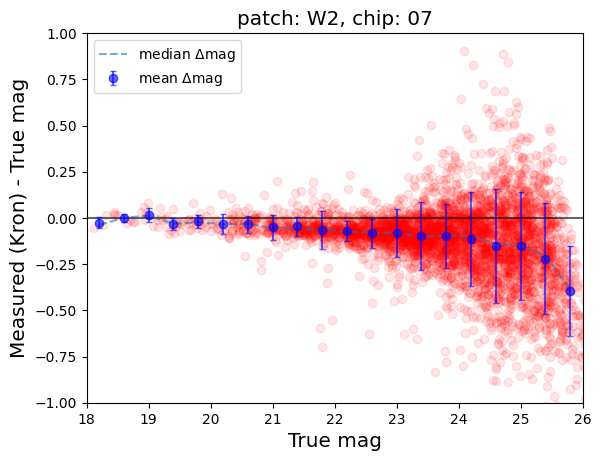

In [16]:
importlib.reload(evaluation_utils)
sky_area_label="W2"
injected_truth_dir = "/public/home/fangyuedong/project/injected_50sqDeg_L1_outputs/50sqDeg_Photo_%s/"%(sky_area_label)
injected_l1_output_dir = "/public/home/fangyuedong/project/processed_injected_50sqDeg_L1_outputs/50sqDeg_Photo_%s/"%(sky_area_label)

cat_path_list_injected_truth = glob(injected_truth_dir + "*/*_%s_*.cat*"%(chip_label))
evaluation_utils.plot_mag_comparison(truth_cat_list=cat_path_list_injected_truth,
                                    measured_cat_root_dir=injected_l1_output_dir,
                                    save_fig_dir=fig_root_dir,
                                    fig_prefix="%s_%s_"%(sky_area_label, chip_label),
                                    title="patch: %s, chip: %s"%(sky_area_label, chip_label))

Injected truth catalog:  CSST_MSC_MS_SCIE_20230413170825_20230413171055_10160000000_07_img_L1_injected.cat
L1 processed photometry catalog:  CSST_MSC_MS_SCIE_20230413170825_20230413171055_10160000000_07_img_L1_injected.cat
number of matched sources =  421
Injected truth catalog:  CSST_MSC_MS_SCIE_20231014221159_20231014221429_10160000003_07_img_L1_injected.cat
L1 processed photometry catalog:  CSST_MSC_MS_SCIE_20231014221159_20231014221429_10160000003_07_img_L1_injected.cat
number of matched sources =  407
Injected truth catalog:  CSST_MSC_MS_SCIE_20231018000424_20231018000654_10160000005_07_img_L1_injected.cat
L1 processed photometry catalog:  CSST_MSC_MS_SCIE_20231018000424_20231018000654_10160000005_07_img_L1_injected.cat
number of matched sources =  398
Injected truth catalog:  CSST_MSC_MS_SCIE_20231206174315_20231206174545_10160000007_07_img_L1_injected.cat
L1 processed photometry catalog:  CSST_MSC_MS_SCIE_20231206174315_20231206174545_10160000007_07_img_L1_injected.cat
number of

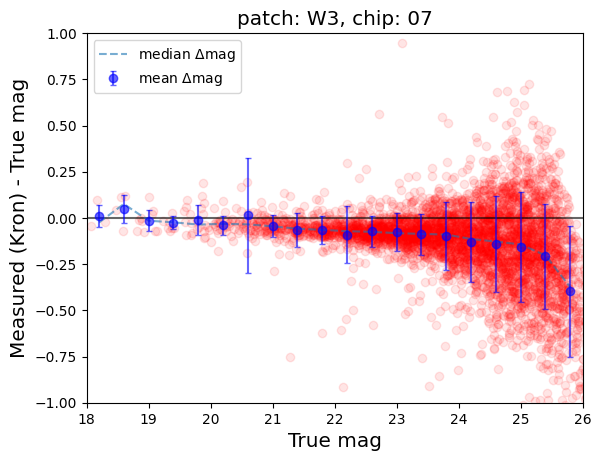

In [17]:
importlib.reload(evaluation_utils)
sky_area_label="W3"
injected_truth_dir = "/public/home/fangyuedong/project/injected_50sqDeg_L1_outputs/50sqDeg_Photo_%s/"%(sky_area_label)
injected_l1_output_dir = "/public/home/fangyuedong/project/processed_injected_50sqDeg_L1_outputs/50sqDeg_Photo_%s/"%(sky_area_label)

cat_path_list_injected_truth = glob(injected_truth_dir + "*/*_%s_*.cat*"%(chip_label))
evaluation_utils.plot_mag_comparison(truth_cat_list=cat_path_list_injected_truth,
                                    measured_cat_root_dir=injected_l1_output_dir,
                                    save_fig_dir=fig_root_dir,
                                    fig_prefix="%s_%s_"%(sky_area_label, chip_label),
                                    title="patch: %s, chip: %s"%(sky_area_label, chip_label))